<a href="https://colab.research.google.com/github/Kzzrll/HMM3/blob/main/ML_DZ_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к занятию «Классификация: Логистическая регрессия и SVM»

Задание

Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

Описание задания:
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.
Если возникают проблемы с открытием вайла выше можно воспользоваться альтарнативным документом:
archive.ics.uci.edu...et/2/adult

Задачу классификации нужно решить при помощи модели логистической регрессии и модели опорных векторов.

Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

2. Проведите первичный анализ:
a) проверьте данные на пропуски. Удалите в случае обнаружения.
* Предложите альтернативный способ работы с пропусками
b) постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
c) преобразуйте категориальные признаки

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4. Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

5. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

6. Сформулируйте выводы по проделанной работе:
a) кратко опишите какие преобразования были сделаны с данными.
b) cравните точность двух моделей.
c) напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
* Что по вашему мнению нужно сделать, чтобы улучшить результат?

Для получение зачёта по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

Результат: получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.
Форма выполнения: ссылка на Jupyter Notebook, загруженный на GitHub; ссылка на Google Colab; файл с расширением .ipynb.
Инструменты: Jupyter Notebook/Google Colab; GitHub.
Срок выполнения: 7 календарных дней

Рекомендации к выполнению:

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

# 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import svm

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
pm = r'/content/drive/My Drive/ML/ML_DZ/ML_DZ_1/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
f_1 = 'adult.csv'

In [ ]:
df = pd.read_csv(f'{pm}{f_1}', sep = ',')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Первичный анализ набора данных.
Общее количество наблюдений: 48 842 записи без пропущенных значений (non-null).

Числовые признаки (int64):

age — возраст респондента (целочисленный тип)

fnlwgt — финальный вес выборки (вероятно, статистический вес для репрезентации);

educational-num — числовое представление уровня образования;

capital-gain — доход от капитала;

capital-loss — потери капитала;

hours-per-week — количество рабочих часов в неделю;

Категориальные признаки (object):

workclass — тип занятости/работодателя;

education — уровень образования (текстовое описание);

marital-status — семейное положение;

occupation — профессия/род занятий;

relationship — семейные отношения (например, женатый/замужем);

race — расовая принадлежность;

gender — пол респондента;

native-country — страна происхождения;

income — уровень дохода (вероятно, целевой признак).

In [ ]:
# Уникальные значения столбцов
print(df['age'].unique())
print(df['workclass'].unique())
print(df['fnlwgt'].unique())
print(df['education'].unique())
print(df['educational-num'].unique())
print(df['marital-status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['gender'].unique())
print(df['capital-gain'].unique())
print(df['capital-loss'].unique())
print(df['hours-per-week'].unique())
print(df['native-country'].unique())
print(df['income'].unique())

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[226802  89814 336951 ... 129912 255835 257302]
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-

In [ ]:
# Для числовых столбцов
numeric_result = df.select_dtypes(include='number').apply(pd.Series.value_counts)
numeric_result.head(10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,NaN,NaN,NaN,44807.0,46560.0,NaN
1,NaN,NaN,83.0,NaN,NaN,27.0
2,NaN,NaN,247.0,NaN,NaN,53.0
3,NaN,NaN,509.0,NaN,NaN,59.0
4,NaN,NaN,955.0,NaN,NaN,84.0
5,NaN,NaN,756.0,NaN,NaN,95.0
6,NaN,NaN,1389.0,NaN,NaN,92.0
7,NaN,NaN,1812.0,NaN,NaN,45.0
8,NaN,NaN,657.0,NaN,NaN,218.0
9,NaN,NaN,15784.0,NaN,NaN,27.0


In [ ]:
# Для категориальных столбцов
categorical_result = df.select_dtypes(include='object').apply(pd.Series.value_counts)
categorical_result.head(20)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
10th,NaN,1389.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11th,NaN,1812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12th,NaN,657.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st-4th,NaN,247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5th-6th,NaN,509.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7th-8th,NaN,955.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9th,NaN,756.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<=50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37155.0
>50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11687.0
?,2799.0,NaN,NaN,2809.0,NaN,NaN,NaN,857.0,NaN


Проведем замену всех значений '?' в датафрейме на NaN

In [ ]:
df = df.replace('?', None)
df = df.dropna()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


capital-gain — доход от капитала;

capital-loss — потери капитала;

hours-per-week — количество рабочих часов в неделю;

Категориальные признаки (object):

workclass — тип занятости/работодателя;

education — уровень образования (текстовое описание);

marital-status — семейное положение;

In [ ]:
new_names = {
    'educational-num': 'educational_num',
    'capital-gain'   : 'capital_gain',
    'capital-loss'   : 'capital_loss',
    'hours-per-week'   : 'hours_per_week',
    'marital-status'   : 'marital_status',


}

df = df.rename(columns=new_names)

In [ ]:
df

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 2. Проведите первичный анализ:

## a) проверьте данные на пропуски. Удалите в случае обнаружения.
Предложите альтернативный способ работы с пропусками

In [ ]:
# Расчитаем пропуски в %
(df.isna().mean() * 100).round(2)

,0
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
educational_num,0.0
marital_status,0.0
occupation,0.0
relationship,0.0
race,0.0
gender,0.0


## b) постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

### Столбец age

In [ ]:
df["age"].describe()

,age
count,45222.000000
mean,38.547941
std,13.217870
min,17.000000
25%,28.000000
50%,37.000000
75%,47.000000
max,90.000000


In [ ]:
#Мода
print('Мода:', df['age'].mode()[0])
# Квартили
q25_age = df['age'].quantile(0.25)
q50_age = df['age'].quantile(0.50)  # медиана
q75_age = df['age'].quantile(0.75)
iqr_age = q75_age - q25_age  # межквартильный размах
print('Межквартильный размах:', iqr_age)
# Дополнительные характеристики
print('Дисперсия:', df['age'].var())# дисперсия
print('Асимметрия:', df['age'].skew())  # асимметрия
print('Эксцесс:', df['age'].kurtosis())  # эксцесс

Мода: 36
Межквартильный размах: 19.0
Дисперсия: 174.7120931277949
Асимметрия: 0.5328158942555791
Эксцесс: -0.15587445202596317


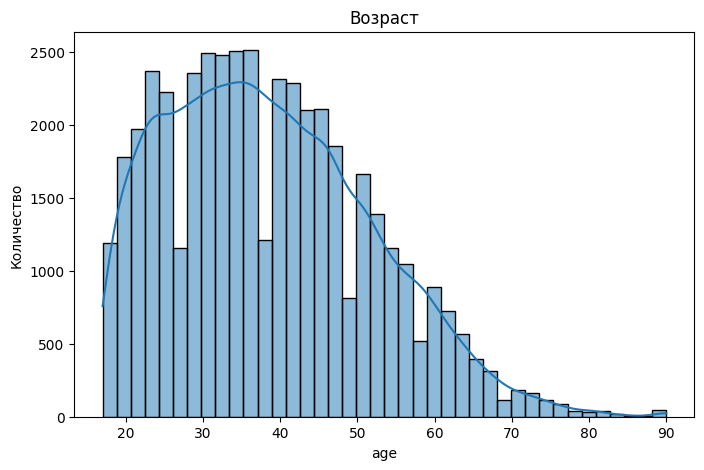

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x="age", bins=40, kde=True)
plt.title("Возраст")
plt.ylabel("Количество")
plt.show()

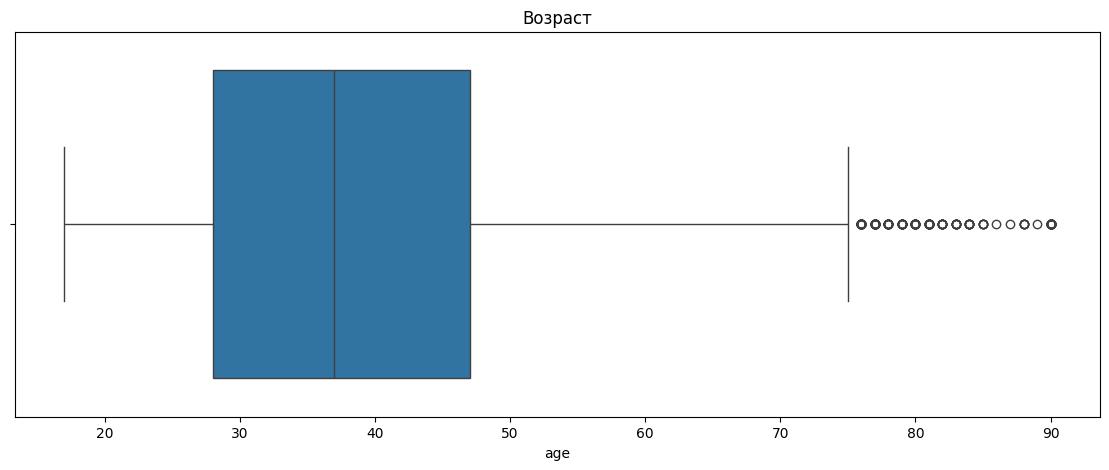

In [ ]:
plt.figure(figsize=[14,5])
sns.boxplot(data=df, x='age')
plt.title("Возраст")
plt.show()

Имеются выбросы

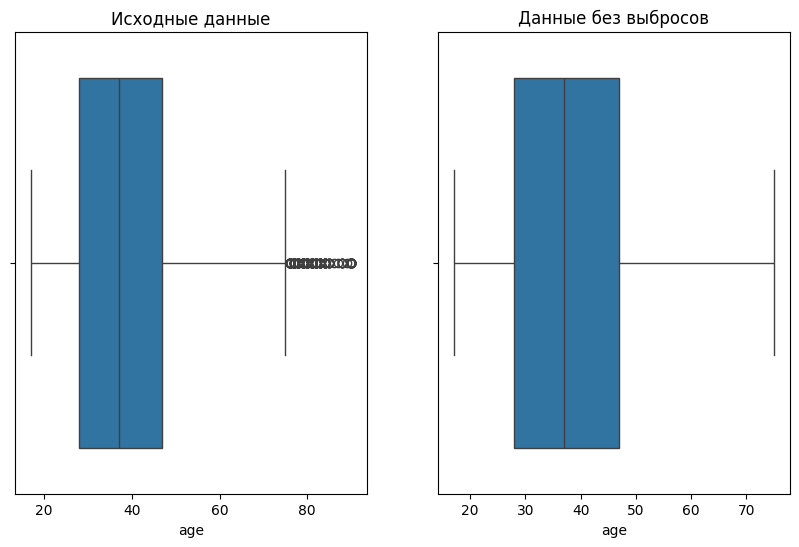

In [ ]:
# Вычисляем границы
lower_bound_Age = q25_age - (1.5 * iqr_age)
upper_bound_Age = q75_age + (1.5 * iqr_age)

# Очищаем данные от выбросов
clean_df = df[
    (df['age'] >= lower_bound_Age) &
    (df['age'] <= upper_bound_Age)
].sort_values('income')

# Выделяем выбросы
outliers_Age = df[
    (df['age'] < lower_bound_Age) |
    (df['age'] > upper_bound_Age)
]

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'])
plt.title('Исходные данные')

plt.subplot(1, 2, 2)
sns.boxplot(x=clean_df['age'])
plt.title('Данные без выбросов')

plt.show()

Выбросы отстуствуют

### Столбец fnlwgt — финальный вес выборки (вероятно, статистический вес для репрезентации). Final Weight (fnlwgt) — это финальный статистический вес, который используется в демографических и социологических исследованиях для корректировки выборки.
Статистический вес — это коэффициент, который показывает, сколько представителей генеральной совокупности представляет каждая единица выборки. Проще говоря, это число показывает, сколько реальных людей в популяции отражает один респондент из выборки.
Данный столбец нам не понадобится. Удаляем его.

In [ ]:
df=clean_df.drop('fnlwgt',axis=1)

In [ ]:
df

,age,workclass,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
30206,33,Private,7th-8th,4,Divorced,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
30207,43,Private,HS-grad,9,Separated,Other-service,Not-in-family,White,Female,0,0,26,United-States,<=50K
30208,60,Self-emp-inc,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
30210,32,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11152,49,Private,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,>50K
11149,33,Self-emp-not-inc,Assoc-voc,11,Divorced,Craft-repair,Not-in-family,White,Male,10520,0,80,United-States,>50K
11147,34,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,48,United-States,>50K
33895,34,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,43,United-States,>50K


### Можем удалить столбцы

1.   capital_gain
2.   capital_loss



In [ ]:
df=df.drop('capital_gain',axis=1)
df=df.drop('capital_loss',axis=1)
df

,age,workclass,education,educational_num,marital_status,occupation,relationship,race,gender,hours_per_week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
30206,33,Private,7th-8th,4,Divorced,Handlers-cleaners,Own-child,White,Male,40,United-States,<=50K
30207,43,Private,HS-grad,9,Separated,Other-service,Not-in-family,White,Female,26,United-States,<=50K
30208,60,Self-emp-inc,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,<=50K
30210,32,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,55,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
11152,49,Private,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,40,United-States,>50K
11149,33,Self-emp-not-inc,Assoc-voc,11,Divorced,Craft-repair,Not-in-family,White,Male,80,United-States,>50K
11147,34,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,48,United-States,>50K
33895,34,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,43,United-States,>50K


### Столбец educational_num — числовое представление уровня образования

In [ ]:
df["educational_num"].value_counts(normalize = True)

,proportion
educational_num,
9.0,0.345006
10.0,0.205531
13.0,0.177328
14.0,0.057750
11.0,0.047702
12.0,0.033426
7.0,0.028452
6.0,0.024025
4.0,0.016564


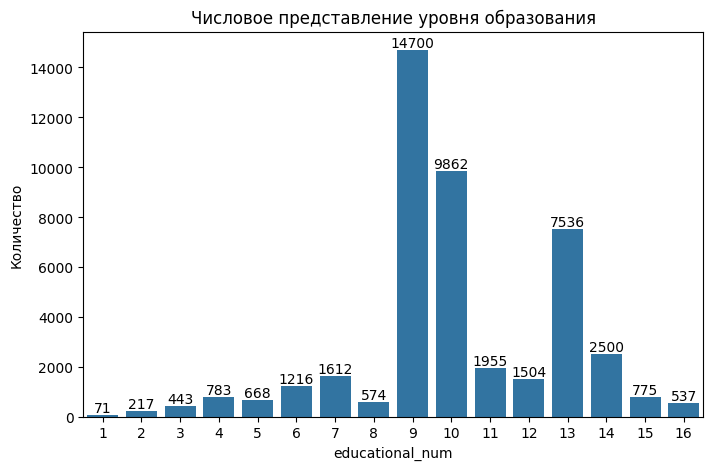

In [ ]:
plt.figure(figsize=[8,5])
ax = sns.countplot(data=df, x="educational_num")
ax.bar_label(ax.containers[0])
plt.title("Числовое представление уровня образования")
plt.ylabel("Количество")
plt.show()

### Столбец income — уровень дохода (вероятно, целевой признак).

In [ ]:
df["income"].value_counts(normalize = True)

,proportion
income,
<=50K,0.751741
>50K,0.248259


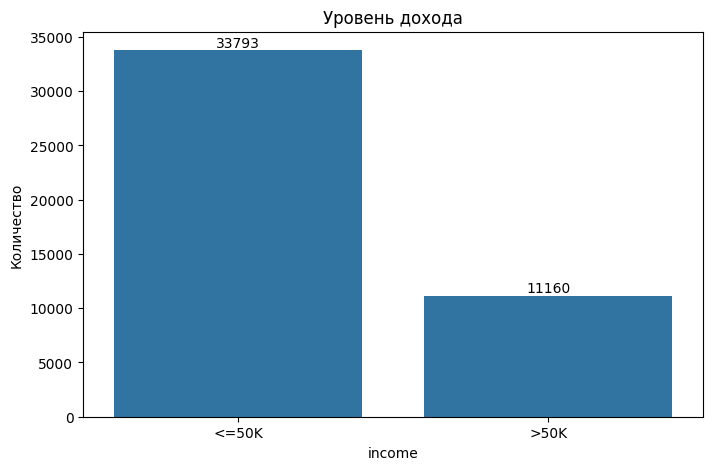

In [ ]:
plt.figure(figsize=[8,5])
ax = sns.countplot(data=df, x="income")
ax.bar_label(ax.containers[0])
plt.title("Уровень дохода")
plt.ylabel("Количество")
plt.show()

### Столбец occupation — профессия/род занятий

In [ ]:
df["occupation"].value_counts(normalize = True)

,proportion
occupation,
Craft-repair,0.133562
Prof-specialty,0.132872
Exec-managerial,0.132049
Adm-clerical,0.122528
Sales,0.119569
Other-service,0.106155
Machine-op-inspct,0.065891
Transport-moving,0.051320
Handlers-cleaners,0.045358


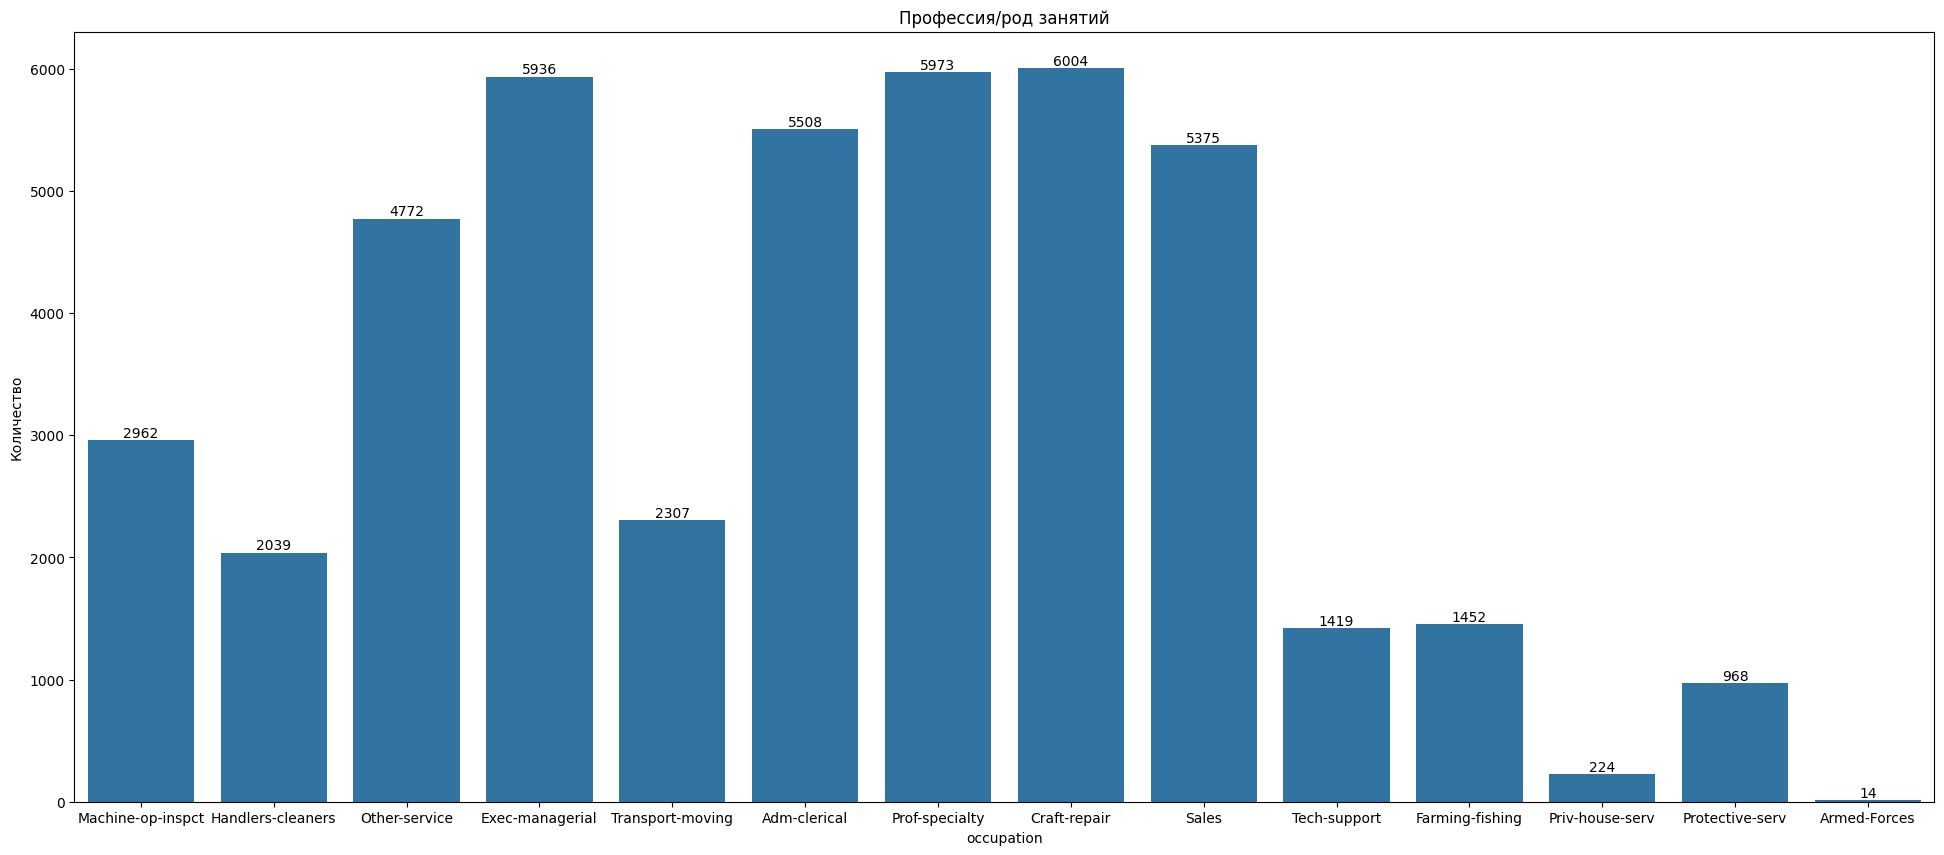

In [ ]:
plt.figure(figsize=[24,10])
ax = sns.countplot(data=df, x="occupation")
ax.bar_label(ax.containers[0])
plt.title("Профессия/род занятий")
plt.ylabel("Количество")
plt.show()

### Столбец hours_per_week — количество рабочих часов в неделю

In [ ]:
df["hours_per_week"].describe()

,hours_per_week
count,44953.000000
mean,41.012102
std,11.942342
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000


In [ ]:
#Мода
print('Мода:', df['hours_per_week'].mode()[0])
# Квартили
q25_hours_per_week = df['hours_per_week'].quantile(0.25)
q50_hours_per_week = df['hours_per_week'].quantile(0.50)  # медиана
q75_hours_per_week = df['hours_per_week'].quantile(0.75)
iqr_hours_per_week = q75_hours_per_week - q25_hours_per_week  # межквартильный размах
print('Межквартильный размах:', iqr_hours_per_week)
# Дополнительные характеристики
print('Дисперсия:', df['hours_per_week'].var())# дисперсия
print('Асимметрия:', df['hours_per_week'].skew())  # асимметрия
print('Эксцесс:', df['hours_per_week'].kurtosis())  # эксцесс

Мода: 40
Межквартильный размах: 5.0
Дисперсия: 142.6195367673974
Асимметрия: 0.35980533496983974
Эксцесс: 3.245663879197186


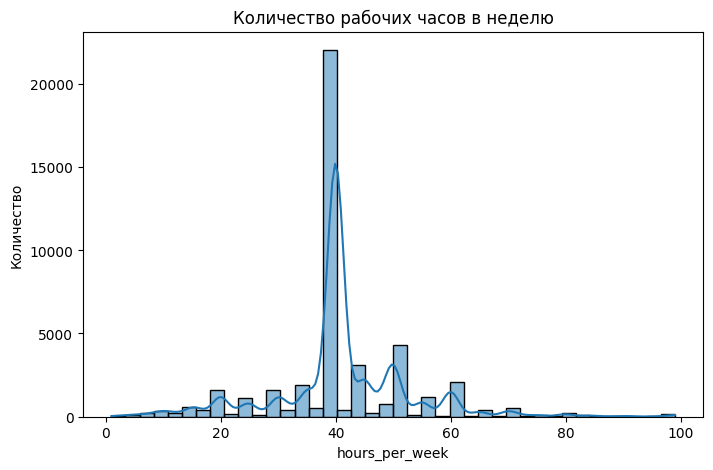

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x="hours_per_week", bins=40, kde=True)
plt.title("Количество рабочих часов в неделю")
plt.ylabel("Количество")
plt.show()

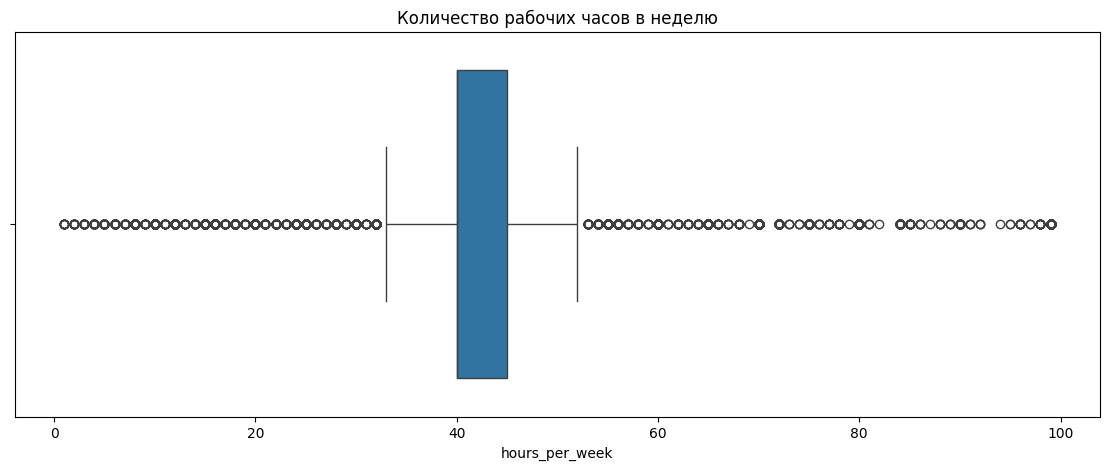

In [ ]:
plt.figure(figsize=[14,5])
sns.boxplot(data=df, x='hours_per_week')
plt.title("Количество рабочих часов в неделю")
plt.show()

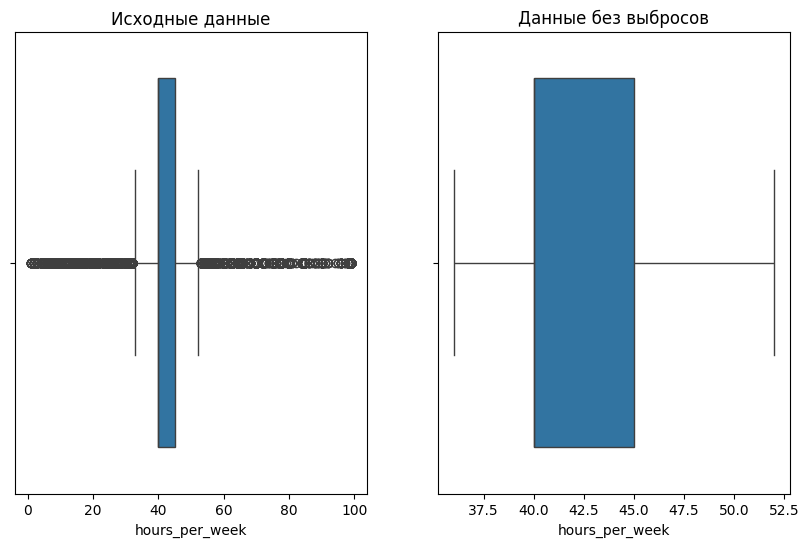

In [ ]:
# Вычисляем границы
lower_bound_hours_per_week = q25_hours_per_week - (0.9 * iqr_hours_per_week)# в ходе опытов 1,5 был заменен
upper_bound_hours_per_week = q75_hours_per_week + (1.5 * iqr_hours_per_week)

# Очищаем данные от выбросов
clean_df = df[
    (df['hours_per_week'] >= lower_bound_hours_per_week) &
    (df['hours_per_week'] <= upper_bound_hours_per_week)
].sort_values('income')

# Выделяем выбросы
outliers_Age = df[
    (df['hours_per_week'] < lower_bound_hours_per_week) |
    (df['hours_per_week'] > upper_bound_hours_per_week)
]

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['hours_per_week'])
plt.title('Исходные данные')

plt.subplot(1, 2, 2)
sns.boxplot(x=clean_df['hours_per_week'])
plt.title('Данные без выбросов')

plt.show()

In [ ]:
df = clean_df
df

,age,workclass,education,educational_num,marital_status,occupation,relationship,race,gender,hours_per_week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
3679,50,Private,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,40,United-States,<=50K
3678,37,Private,Some-college,10,Separated,Machine-op-inspct,Not-in-family,Black,Male,40,United-States,<=50K
3643,18,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,36,United-States,<=50K
3674,24,Private,Assoc-voc,11,Never-married,Craft-repair,Not-in-family,White,Male,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
28138,57,Private,12th,8,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,>50K
28045,46,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,50,Japan,>50K
28079,59,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
15610,56,Federal-gov,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


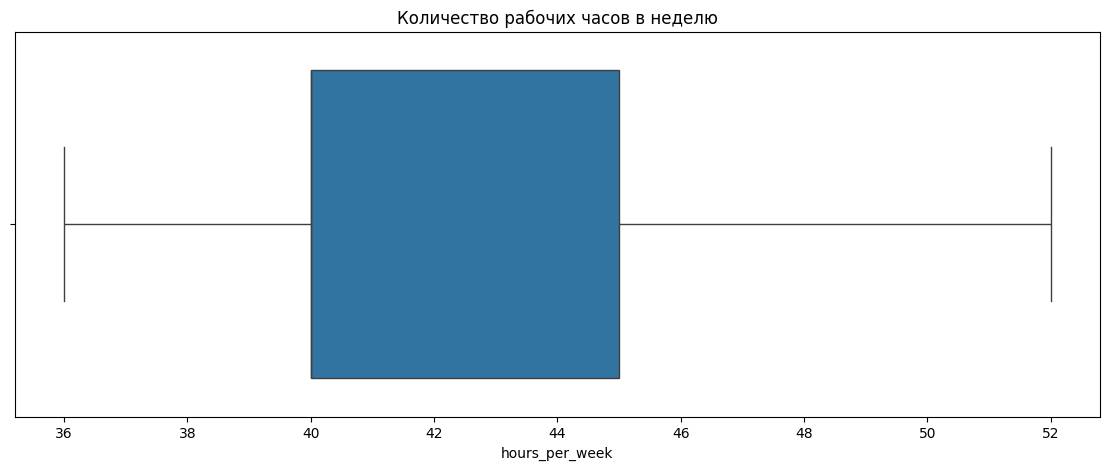

In [ ]:
plt.figure(figsize=[14,5])
sns.boxplot(data=df, x='hours_per_week')
plt.title("Количество рабочих часов в неделю")
plt.show()

### Столбец education — уровень образования (текстовое описание)

In [ ]:
df["education"].value_counts(normalize = True)

,proportion
education,
HS-grad,0.344381
Some-college,0.205365
Bachelors,0.176082
Masters,0.056046
Assoc-voc,0.048391
Assoc-acdm,0.034387
11th,0.027529
10th,0.024116
7th-8th,0.016970


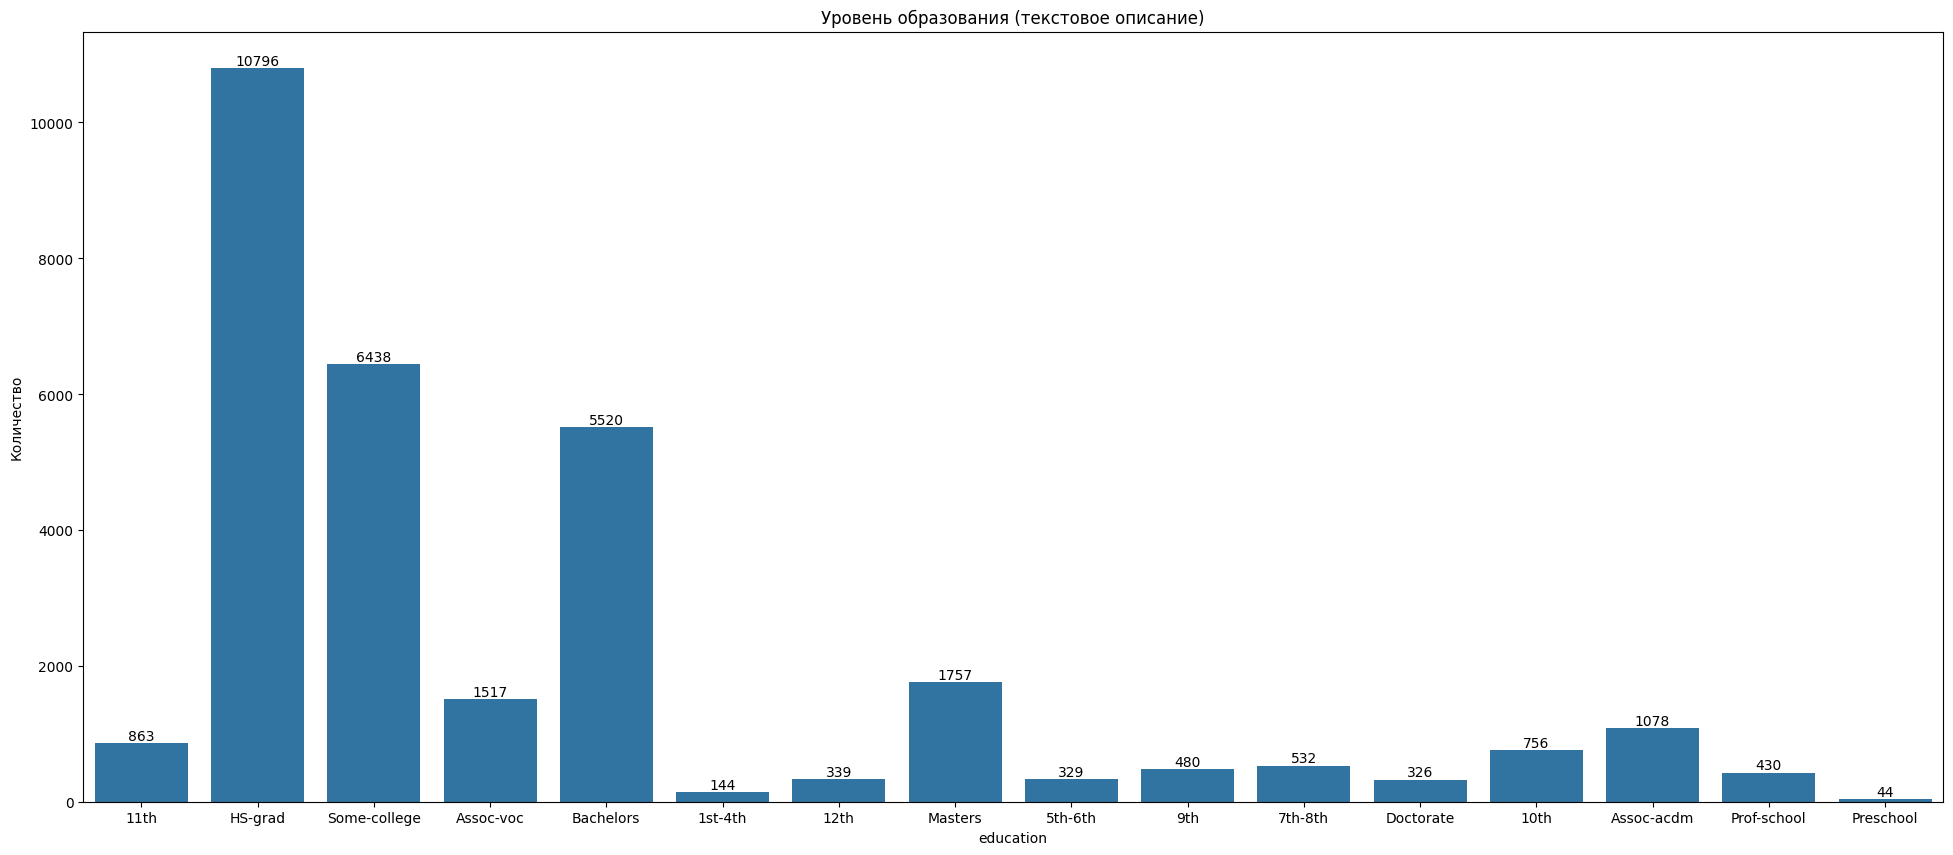

In [ ]:
plt.figure(figsize=[24,10])
ax = sns.countplot(data=df, x="education")
ax.bar_label(ax.containers[0])
plt.title("Уровень образования (текстовое описание)")
plt.ylabel("Количество")
plt.show()

### Рассмотрим ряд зависимостей. На уровень дохода влияет: число рабочих часов в неделю, уровень образования, возраст (здесь косьвенное влияние, имеется в виду, что работник в возрасте с большей веротяностью будет иметь больший стаж работы, высокий уровень образования, чем молодой работник)

### Возраст и доход

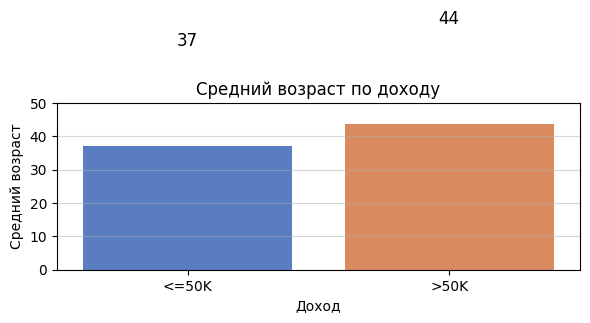

In [ ]:
# Группируем данные по доходу и вычисляем средний возраст
mean_salaries = df.groupby('income')['age'].mean()

# Создаем график
plt.figure(figsize=(6, 4))
# Используем параметр hue и отключаем легенду
sns.barplot(
    x=mean_salaries.index,
    y=mean_salaries.values,
    hue=mean_salaries.index,  # добавляем hue
    palette='muted',
    legend=False  # отключаем легенду
)

# Добавляем аннотации со значениями
for i, v in enumerate(mean_salaries.values):
    plt.text(i, v + 30, f'{v:.0f}', ha='center', fontsize=12)

# Настраиваем оформление
plt.title('Средний возраст по доходу')
plt.xlabel('Доход')
plt.ylabel('Средний возраст')
plt.ylim(0, 50)  # Устанавливаем пределы по оси Y
plt.grid(axis='y', alpha=0.5)

# Показываем график
plt.tight_layout()
plt.show()


Как уже говорилось, влияние возраста на доход досточно косвенное. Вот и на графике видно, что распределение по возрасту достатояно билизко, что говорит о том, что в нашем случае на имеющихмя данных это влиянение не очень сильно.

### Профессия и доход

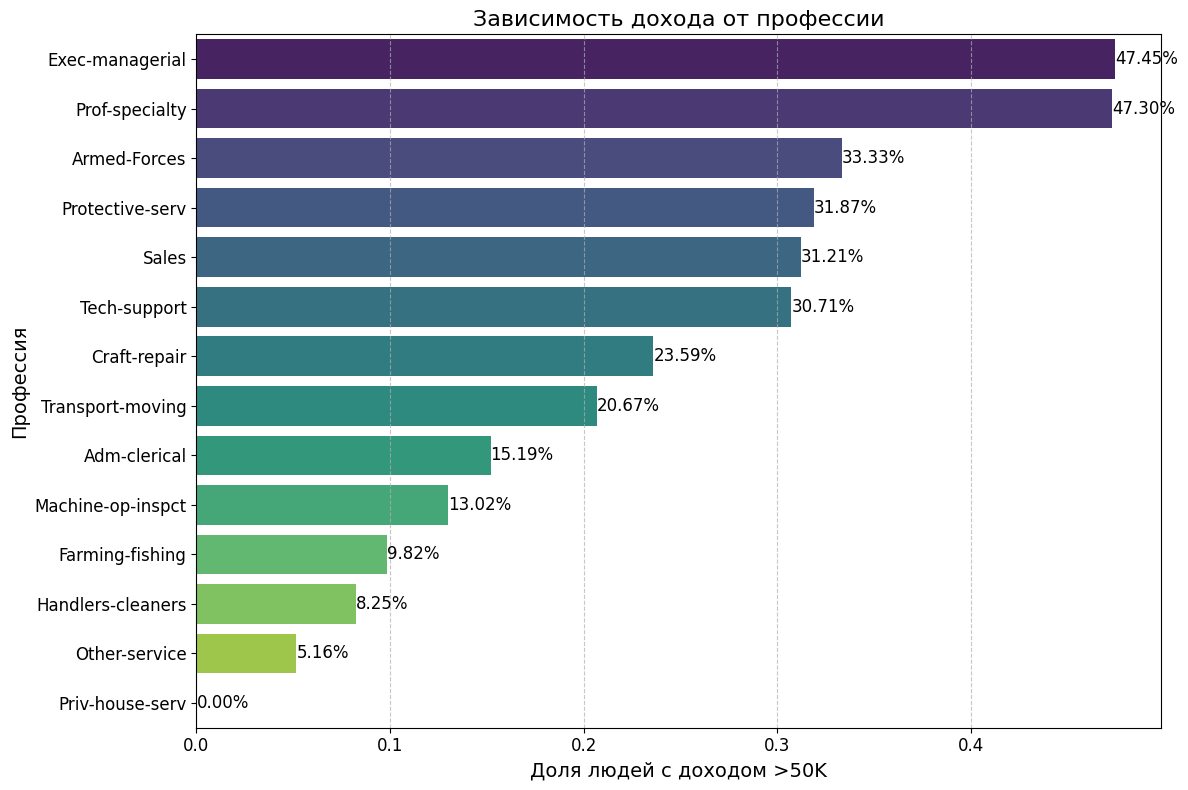

In [ ]:
# Группируем данные по occupation и считаем средние значения дохода
# Создаем новый столбец с числовым представлением дохода
df['income_num'] = df['income'].map({'>50K': 1, '<=50K': 0})

# Группируем данные
grouped = df.groupby('occupation')['income_num'].mean().reset_index()

# Сортируем по убыванию среднего дохода
grouped = grouped.sort_values('income_num', ascending=False)

# Построение графика
plt.figure(figsize=(12, 8))
# Добавляем hue и отключаем легенду
sns.barplot(
    x='income_num',
    y='occupation',
    data=grouped,
    hue='occupation',  # добавляем hue
    palette='viridis',
    legend=False      # отключаем легенду
)

# Настройка отображения
plt.title('Зависимость дохода от профессии', fontsize=16)
plt.xlabel('Доля людей с доходом >50K', fontsize=14)
plt.ylabel('Профессия', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем значения на график
for i, val in enumerate(grouped['income_num']):
    plt.text(val, i, f'{val:.2%}', va='center', ha='left', fontsize=12)

plt.tight_layout()
plt.show()


### Количество рабочих часов в неделю

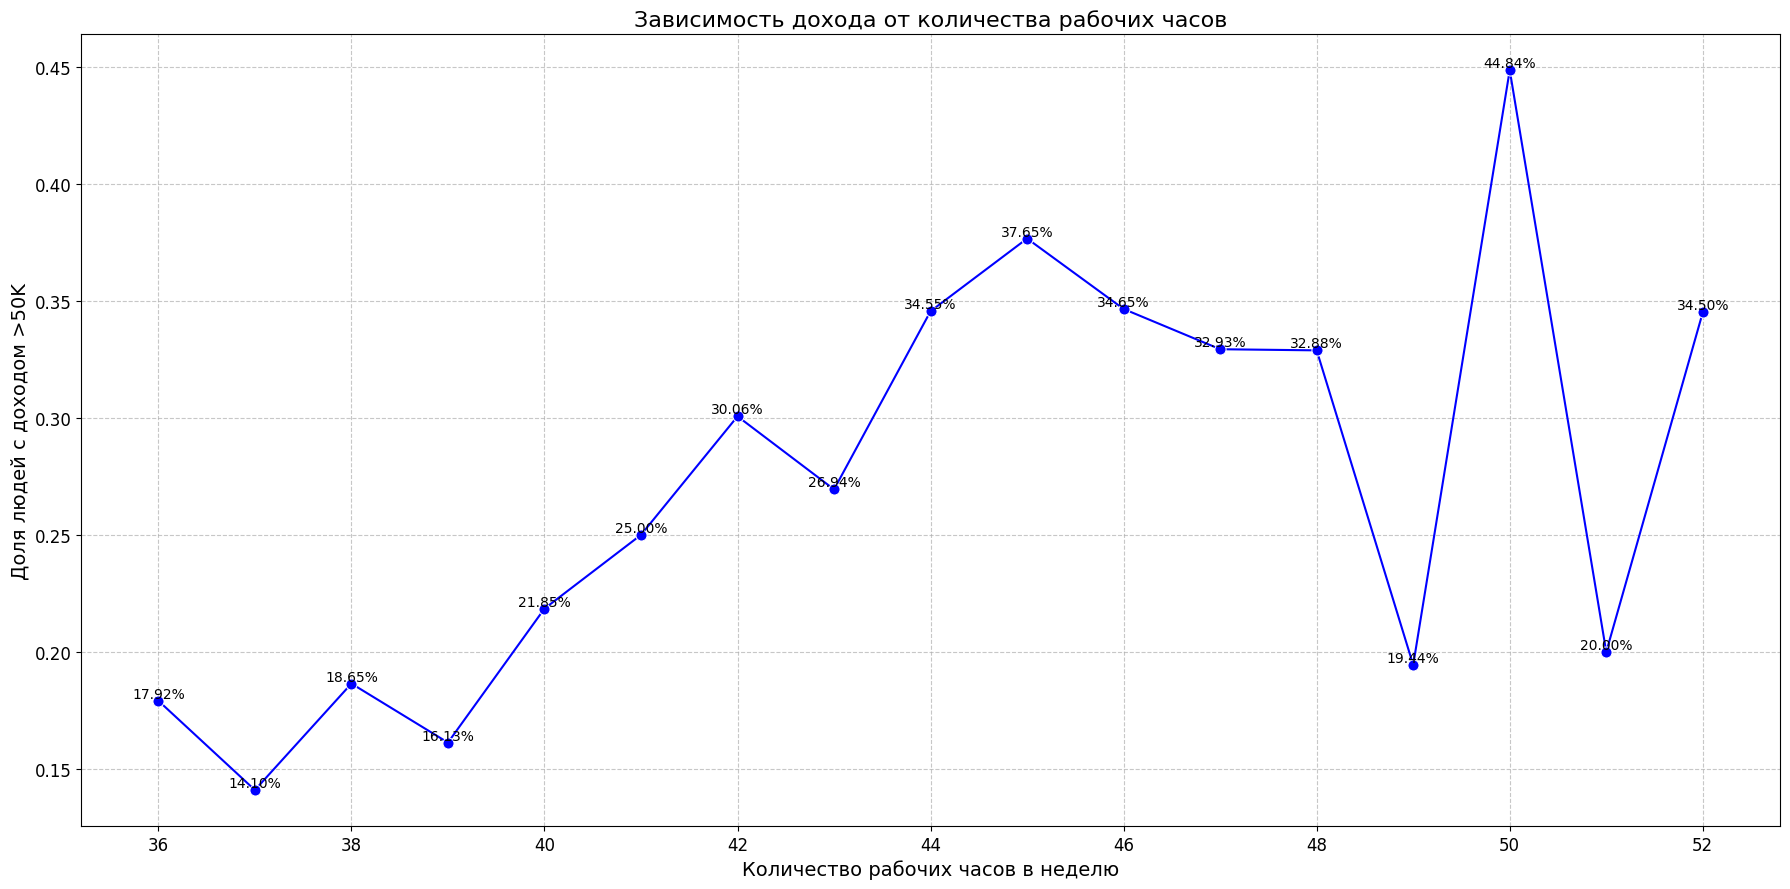

In [ ]:
# Группируем данные по часам работы и считаем средние значения
grouped = df.groupby('hours_per_week')['income_num'].mean().reset_index()

# Построение графика
plt.figure(figsize=(18, 9))
sns.lineplot(
    x='hours_per_week',
    y='income_num',
    data=grouped,
    marker='o',
    markersize=8,
    color='blue'
)

# Настройка отображения
plt.title('Зависимость дохода от количества рабочих часов', fontsize=16)
plt.xlabel('Количество рабочих часов в неделю', fontsize=14)
plt.ylabel('Доля людей с доходом >50K', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--', alpha=0.7)

# Добавляем значения на график
for i, val in enumerate(grouped['income_num']):
    plt.text(
        grouped['hours_per_week'].iloc[i],
        val,
        f'{val:.2%}',
        va='bottom',
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [ ]:
df=df.drop('income_num',axis=1)

In [ ]:
df

,age,workclass,education,educational_num,marital_status,occupation,relationship,race,gender,hours_per_week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
3679,50,Private,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,40,United-States,<=50K
3678,37,Private,Some-college,10,Separated,Machine-op-inspct,Not-in-family,Black,Male,40,United-States,<=50K
3643,18,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,36,United-States,<=50K
3674,24,Private,Assoc-voc,11,Never-married,Craft-repair,Not-in-family,White,Male,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
28138,57,Private,12th,8,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,>50K
28045,46,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,50,Japan,>50K
28079,59,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
15610,56,Federal-gov,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


### Построим матрицу корреляций.

In [ ]:
!pip install phik
import phik
from phik.report import plot_correlation_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 15.0 MB/s eta 0:00:00


In [ ]:
phik_overview = df.phik_matrix(interval_cols=['age','educational_num','hours_per_week'])
phik_overview

,age,workclass,education,educational_num,marital_status,occupation,relationship,race,gender,hours_per_week,native-country,income
age,1.000000,0.165565,0.211351,0.232811,0.432613,0.182277,0.393380,0.052859,0.094314,0.112393,0.101477,0.374770
workclass,0.165565,1.000000,0.230240,0.176928,0.164012,0.496715,0.114577,0.088881,0.115753,0.166430,0.073618,0.133527
education,0.211351,0.230240,1.000000,1.000000,0.137054,0.500712,0.177126,0.149014,0.103190,0.162009,0.445925,0.443604
educational_num,0.232811,0.176928,1.000000,1.000000,0.117203,0.502500,0.154990,0.176768,0.105040,0.200785,0.450063,0.447123
marital_status,0.432613,0.164012,0.137054,0.117203,1.000000,0.285885,0.669048,0.131543,0.439824,0.116550,0.142102,0.411134
occupation,0.182277,0.496715,0.500712,0.502500,0.285885,1.000000,0.305419,0.164365,0.535887,0.223366,0.258916,0.422738
relationship,0.393380,0.114577,0.177126,0.154990,0.669048,0.305419,1.000000,0.143501,0.849520,0.166935,0.173006,0.612487
race,0.052859,0.088881,0.149014,0.176768,0.131543,0.164365,0.143501,1.000000,0.103705,0.149940,0.707977,0.086162
gender,0.094314,0.115753,0.103190,0.105040,0.439824,0.535887,0.849520,0.103705,1.000000,0.236416,0.058619,0.319958
hours_per_week,0.112393,0.166430,0.162009,0.200785,0.116550,0.223366,0.166935,0.149940,0.236416,1.000000,0.052837,0.252383


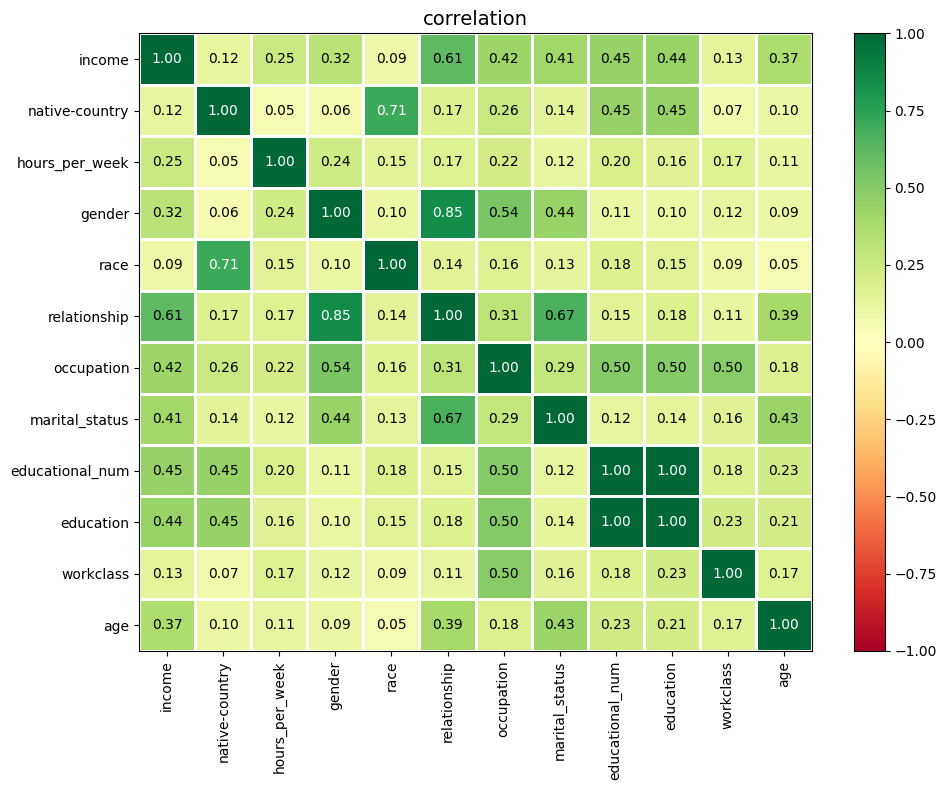

In [ ]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(10, 8))

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
education,0
educational_num,0
marital_status,0
occupation,0
relationship,0
race,0
gender,0
hours_per_week,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31349 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              31349 non-null  int64 
 1   workclass        31349 non-null  object
 2   education        31349 non-null  object
 3   educational_num  31349 non-null  int64 
 4   marital_status   31349 non-null  object
 5   occupation       31349 non-null  object
 6   relationship     31349 non-null  object
 7   race             31349 non-null  object
 8   gender           31349 non-null  object
 9   hours_per_week   31349 non-null  int64 
 10  native-country   31349 non-null  object
 11  income           31349 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.1+ MB


In [ ]:
print(df.isnull().sum().sum())

0


In [ ]:
df

,age,workclass,education,educational_num,marital_status,occupation,relationship,race,gender,hours_per_week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
3679,50,Private,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,40,United-States,<=50K
3678,37,Private,Some-college,10,Separated,Machine-op-inspct,Not-in-family,Black,Male,40,United-States,<=50K
3643,18,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,36,United-States,<=50K
3674,24,Private,Assoc-voc,11,Never-married,Craft-repair,Not-in-family,White,Male,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
28138,57,Private,12th,8,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,>50K
28045,46,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,50,Japan,>50K
28079,59,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
15610,56,Federal-gov,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


## c) преобразуйте категориальные признаки

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [ ]:
categorical_features = [
    'workclass', 'education', 'marital_status',
    'occupation', 'relationship', 'race', 'gender',
    'native-country'
]

In [ ]:
# Создаем объект кодировщика с правильными параметрами
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Преобразуем категориальные признаки
encoded_features = encoder.fit_transform(df[categorical_features])

# Создаем новые столбцы с правильными названиями
encoded_df = pd.DataFrame(
    encoded_features,
    columns=encoder.get_feature_names_out(categorical_features)
)

# Кодируем целевую переменную
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

# Объединяем все признаки
df.drop(columns=categorical_features, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df

,age,educational_num,hours_per_week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,7.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3679,50.0,9.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3678,37.0,10.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3643,18.0,9.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3674,24.0,11.0,45.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31341,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31342,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31344,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31345,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df.isnull().sum().sum())

1057030


In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum().sum())

0


In [ ]:
df

,age,educational_num,hours_per_week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,7.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3679,50.0,9.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3678,37.0,10.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3643,18.0,9.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3674,24.0,11.0,45.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28147,45.0,13.0,48.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28138,57.0,8.0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28045,46.0,14.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28079,59.0,13.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Разделяем данные на признаки и целевой признак
X = df.drop('income', axis=1)
y = df['income']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% на тест
    random_state=42,  # для воспроизводимости
    stratify=y  # сохранение баланса классов
)


In [ ]:
X

,age,educational_num,hours_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,7.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3679,50.0,9.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3678,37.0,10.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3643,18.0,9.0,36.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3674,24.0,11.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28147,45.0,13.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28138,57.0,8.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28045,46.0,14.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28079,59.0,13.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y

,income
0,0.0
3679,0.0
3678,0.0
3643,0.0
3674,0.0
...,...
28147,1.0
28138,1.0
28045,1.0
28079,1.0


# 4. Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

In [ ]:
# Обучение логистической регрессии
logreg = LogisticRegression(
    max_iter=1000,  # увеличиваем количество итераций
    solver='liblinear'  # выбираем решатель
)
logreg.fit(X_train, y_train)

# Обучение SVM
svm = SVC(
    kernel='linear',  # линейное ядро
    random_state=42
)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# 5. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

In [ ]:
# Оценка моделей
# Логистическая регрессия
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Точность логистической регрессии: {logreg_accuracy:.4f}")
print("Отчет классификации для логистической регрессии:")
print(classification_report(y_test, y_pred_logreg))

# SVM
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Точность SVM: {svm_accuracy:.4f}")
print("Отчет классификации для SVM:")
print(classification_report(y_test, y_pred_svm))

Точность логистической регрессии: 0.7705
Отчет классификации для логистической регрессии:
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86      2951
         1.0       0.63      0.33      0.43      1070

    accuracy                           0.77      4021
   macro avg       0.71      0.63      0.64      4021
weighted avg       0.75      0.77      0.74      4021

Точность SVM: 0.7620
Отчет классификации для SVM:
              precision    recall  f1-score   support

         0.0       0.76      0.98      0.86      2951
         1.0       0.76      0.15      0.26      1070

    accuracy                           0.76      4021
   macro avg       0.76      0.57      0.56      4021
weighted avg       0.76      0.76      0.70      4021



# 6. Cформулируйте выводы по проделанной работе:

a) кратко опишите какие преобразования были сделаны с данными.

В ходе работы работы были загружены данные.

Данные были изучены на предмет пропусков и аномалий.

Рассмотрены основыные составляющие и зависимости. Построены графики.

Построена корреляционная матрица для выявления зависимостей (универсальный метод phik).

В ходе подготовки к построениею моделей модели логистической регрессии и опорных векторов:
- произведен выбор данных;
- произведена очистка данных;
- преобразование категориальных данных в бинарные;
- перед разделением данных произведена проверка данных и удаление строк с NaN;
- данные распредлены на обучающие и тестовые ( 80% , 20%);
- обучены модели;
- произведеная оценка работы моделей.

b) cравните точность двух моделей.

c) напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

Что по вашему мнению нужно сделать, чтобы улучшить результат?

**Общие показатели.**

Accuracy (общая точность):

Логистическая регрессия: 77.05%;

SVM: 76.20%;

Общая точность показывает долю правильно классифицированных наблюдений. Логистическая регрессия показывает немного лучший результат.

**Детальный анализ метрик.**

Метрики представлены для двух классов (0.0 и 1.0):

Класс 0.0 (большинство):

Логистическая регрессия:

Precision: 79% (из всех предсказанных 0, 79% верны);

Recall: 93% (из всех настоящих 0 найдено 93%);

F1-score: 86% (баланс между precision и recall);

SVM:

Precision: 76%;

Recall: 98%;

F1-score: 86%;

Класс 1.0 (меньшинство):

Логистическая регрессия:

Precision: 63%;

Recall: 33%;

F1-score: 43%;

SVM:

Precision: 76%;

Recall: 15%

F1-score: 26%;

**Анализ результатов**
Выводы по классам:

Оба алгоритма лучше работают с классом большинства (0.0).

С классом меньшинства (1.0) проблемы у обеих моделей:

Логистическая регрессия: низкий recall (33%).

SVM: очень низкий recall (15%).

Макро- и взвешенные средние:

Макро-среднее показывает среднее арифметическое метрик по классам:

Логистическая регрессия: 64% F1-score.

SVM: 56% F1-score.

Взвешенное среднее учитывает дисбаланс классов:

Логистическая регрессия: 74% F1-score.

SVM: 70% F1-score.

**Рекомендации.**

Обе модели показывают проблемы с классом меньшинства.

Логистическая регрессия демонстрирует более стабильный результат.

Рекомендуется:


1. Попробовать другие алгоритмы;

2. Использовать техники ансамблирования.